In [45]:
# Santosh Omprakash

### Project 2 - Fake News detection using Machine Learning

In [46]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import pos_tag, pos_tag_sents
from nltk import word_tokenize
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve, confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, validation_curve, learning_curve, GridSearchCV
from sklearn.linear_model import SGDClassifier
from numpy import mean, std
import scikitplot as skplt
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oneor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Read train and test dataset
df_train = pd.read_csv("C:/Users/oneor/Desktop/MS/DSC680/Project 2/train/train.csv")
df_test = pd.read_csv("C:/Users/oneor/Desktop/MS/DSC680/Project 2/test/test.csv")

In [47]:
df_train

,id,title,author,text,label,auth_txt,txt_low,txt_cln,txt_stop_rem,txt_stem
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...,darrell lucus house dem aide: we didn’t even s...,darrell lucus house dem aide: we didnt even se...,darrell lucus house dem aide: didnt even see c...,darrel lucu hous dem aide: didnt even see come...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,Daniel J. Flynn Ever get the feeling your life...,daniel j. flynn ever get the feeling your life...,daniel j. flynn ever get the feeling your life...,daniel j. flynn ever get feeling life circles ...,daniel j. flynn ever get feel life circl round...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...,consortiumnews.com why the truth might get you...,consortiumnews.com why the truth might get you...,consortiumnews.com truth might get fired octob...,consortiumnews.com truth might get fire octob ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss Videos 15 Civilians Killed In ...,jessica purkiss videos 15 civilians killed in ...,jessica purkiss videos civilians killed in si...,jessica purkiss videos civilians killed single...,jessica purkiss video civilian kill singl us a...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Print \nAn Iranian woman has be...,howard portnoy print \nan iranian woman has be...,howard portnoy print \nan iranian woman has be...,howard portnoy print iranian woman sentenced s...,howard portnoy print iranian woman sentenc six...
...,...,...,...,...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,Jerome Hudson Rapper T. I. unloaded on black c...,jerome hudson rapper t. i. unloaded on black c...,jerome hudson rapper t. i. unloaded on black c...,jerome hudson rapper t. i. unloaded black cele...,jerom hudson rapper t. i. unload black celebr ...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,Benjamin Hoffman When the Green Bay Packers lo...,benjamin hoffman when the green bay packers lo...,benjamin hoffman when the green bay packers lo...,benjamin hoffman green bay packers lost washin...,benjamin hoffman green bay packer lost washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,Michael J. de la Merced and Rachel Abrams The ...,michael j. de la merced and rachel abrams the ...,michael j. de la merced and rachel abrams the ...,michael j. de la merced rachel abrams macys to...,michael j. de la merc rachel abram maci today ...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"Alex Ansary NATO, Russia To Hold Parallel Exer...","alex ansary nato, russia to hold parallel exer...","alex ansary nato, russia to hold parallel exer...","alex ansary nato, russia hold parallel exercis...","alex ansari nato, russia hold parallel exercis..."


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


### Data preprocessing

There are some records will null values in Train and Test dataset. They need to be cleaned. 

In [6]:
# Replace null values in train data
df_train.fillna('', inplace=True)

In [7]:
# Replace null values in test data
df_test.fillna('', inplace=True)

In [8]:
df_train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

News data is present in 'text'. Variable 'author' would also be interesting to consider in our model. So, combining 'text' and 'author' variables

In [9]:
df_train['auth_txt'] = df_train['author'] + ' ' + df_train['text']

### Natural Language Processing (NLP)

The data is auth_txt is converted using NLP techniques to be used in models

In [10]:
# Convert all text to lower case
df_train['txt_low'] = df_train['auth_txt'].str.lower()

In [11]:
# Remove special characters
df_train['txt_cln'] = df_train['txt_low'].str.replace('[^a-zA-z.,!?/:;\"\'\s]','')

<ipython-input-11-9c3c58390518>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_train['txt_cln'] = df_train['txt_low'].str.replace('[^a-zA-z.,!?/:;\"\'\s]','')


In [12]:
# Remove stop words
stop = stopwords.words('english')

In [13]:
df_train['txt_stop_rem'] = df_train['txt_cln'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

In [14]:
# Apply portstemmer
porter_stemmer = PorterStemmer()

In [15]:
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

In [16]:
df_train['txt_stem'] = df_train['txt_stop_rem'].apply(stem_sentences)

In [17]:
df_train_fin = df_train[['id', 'label', 'txt_stem']]

In [18]:
df_train_fin

,id,label,txt_stem
0,0,1,darrel lucu hous dem aide: didnt even see come...
1,1,0,daniel j. flynn ever get feel life circl round...
2,2,1,consortiumnews.com truth might get fire octob ...
3,3,1,jessica purkiss video civilian kill singl us a...
4,4,1,howard portnoy print iranian woman sentenc six...
...,...,...,...
20795,20795,0,jerom hudson rapper t. i. unload black celebr ...
20796,20796,0,benjamin hoffman green bay packer lost washing...
20797,20797,0,michael j. de la merc rachel abram maci today ...
20798,20798,1,"alex ansari nato, russia hold parallel exercis..."


### Exploratory Data Analysis (EDA) 

In [19]:
df_train_fin['char_count'] = df_train_fin['txt_stem'].apply(lambda x: len(str(x)))

C:\Users\oneor\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [20]:
df_train_fin['word_count'] = [len(x.split()) for x in df_train_fin['txt_stem'].tolist()]

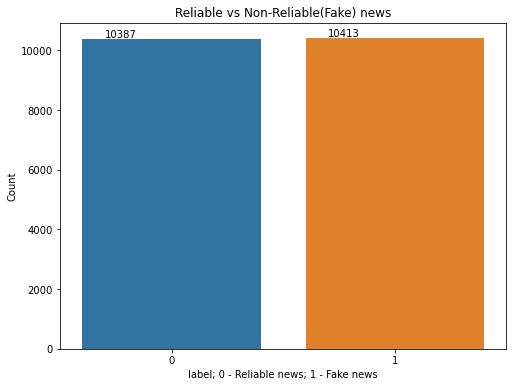

In [21]:
# Reliable vs Fake news count
plt.figure(figsize=(8,6))
ax = sns.countplot(x="label", data=df_train_fin)
plt.title('Reliable vs Non-Reliable(Fake) news')
plt.xlabel('label; 0 - Reliable news; 1 - Fake news')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

The train dataset is balanced where Reliable and Fake news are almost in equal numbers

In [22]:
df_train_rel = df_train_fin.loc[(df_train_fin.label == 0)]

In [23]:
df_train_fake = df_train_fin.loc[(df_train_fin.label == 1)]

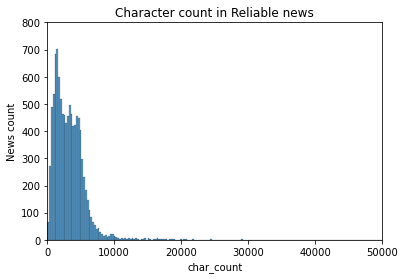

In [24]:
sns.histplot(df_train_rel['char_count'])
plt.ylim(0, 800)
plt.xlim(0, 50000)
plt.ylabel('News count')
plt.title('Character count in Reliable news')
plt.show()

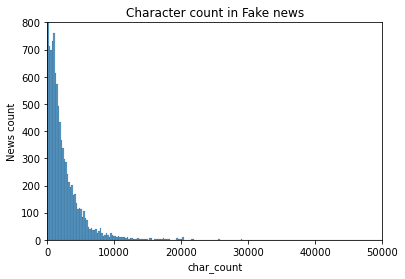

In [25]:
sns.histplot(df_train_fake['char_count'])
plt.ylim(0, 800)
plt.xlim(0, 50000)
plt.ylabel('News count')
plt.title('Character count in Fake news')
plt.show()

Above plots show that Fake news have less character count

In [26]:
df_train_fin['word_count'] = [len(x.split()) for x in df_train_fin['txt_stem'].tolist()]

C:\Users\oneor\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


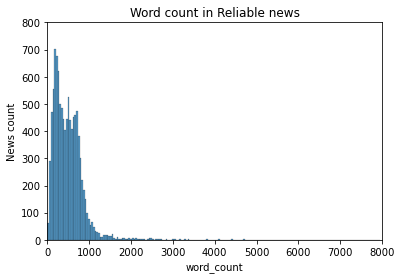

In [27]:
sns.histplot(df_train_rel['word_count'])
plt.ylim(0, 800)
plt.xlim(0, 8000)
plt.ylabel('News count')
plt.title('Word count in Reliable news')
plt.show()

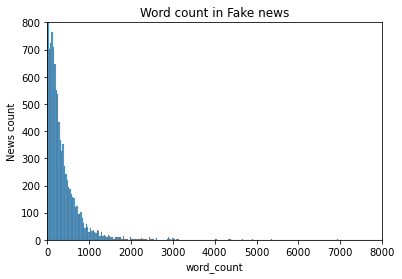

In [28]:
sns.histplot(df_train_fake['word_count'])
plt.ylim(0, 800)
plt.xlim(0, 8000)
plt.ylabel('News count')
plt.title('Word count in Fake news')
plt.show()

### Outlier detection 

In [29]:
min(df_train_fin['char_count'])

0

In [30]:
max(df_train_fin['char_count'])

79346

In [31]:
mean(df_train_fake['char_count'])

2456.910880629982

In [32]:
mean(df_train_rel['char_count'])

3339.688264176374

The minimum character count is 0 and max character count is 79,346. Since the minimum character count is zero, it indicates presence of outliers. Hence, records with character counts of less than 45 are removed  

In [34]:
df_train_fin = df_train_fin.loc[(df_train_fin.char_count > 45)]

Get 10 most common words in Reliable and fake news

In [59]:
vec = CountVectorizer().fit(df_train_rel['txt_stem'])
bgw = vec.transform(df_train_rel['txt_stem'])
sum_word = bgw.sum(axis=0)
words_freq = [(word, sum_word[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq_rel = sorted(words_freq, key = lambda x: x[1], reverse=True)

In [60]:
# Frequent words in reliable news
words_freq_rel

[('said', 68180),
 ('mr', 64581),
 ('trump', 36132),
 ('one', 23137),
 ('would', 22783),
 ('state', 19819),
 ('new', 19709),
 ('like', 18954),
 ('year', 17276),
 ('peopl', 17061),
 ('time', 16132),
 ('also', 15527),
 ('presid', 15343),
 ('ms', 12398),
 ('go', 11891),
 ('could', 11890),
 ('say', 11704),
 ('work', 11612),
 ('american', 11446),
 ('two', 11409),
 ('make', 11251),
 ('last', 11236),
 ('mani', 11015),
 ('first', 10998),
 ('unit', 10852),
 ('even', 10801),
 ('call', 10669),
 ('nation', 10566),
 ('use', 10492),
 ('get', 9863),
 ('report', 9558),
 ('includ', 9491),
 ('news', 9471),
 ('day', 9470),
 ('want', 9247),
 ('take', 8640),
 ('clinton', 8222),
 ('show', 8148),
 ('govern', 8139),
 ('republican', 8134),
 ('that', 8044),
 ('offici', 7940),
 ('back', 7900),
 ('way', 7795),
 ('think', 7774),
 ('made', 7726),
 ('hous', 7667),
 ('campaign', 7665),
 ('obama', 7583),
 ('it', 7512),
 ('may', 7493),
 ('come', 7413),
 ('polit', 7370),
 ('white', 7321),
 ('group', 7274),
 ('support', 

In [63]:
vec1 = CountVectorizer().fit(df_train_fake['txt_stem'])
bgw1 = vec1.transform(df_train_fake['txt_stem'])
sum_word1 = bgw1.sum(axis=0)
words_freq1 = [(word, sum_word1[0, idx]) for word, idx in vec1.vocabulary_.items()]
words_freq_fake = sorted(words_freq1, key = lambda x: x[1], reverse=True)

In [65]:
# Frequent words in fake news
words_freq_fake

[('trump', 19802),
 ('clinton', 19771),
 ('one', 16106),
 ('would', 14466),
 ('us', 14228),
 ('peopl', 14099),
 ('state', 13732),
 ('like', 12492),
 ('said', 11865),
 ('hillari', 11653),
 ('time', 11566),
 ('new', 10367),
 ('also', 9910),
 ('american', 9469),
 ('use', 9371),
 ('go', 9266),
 ('world', 9130),
 ('even', 8988),
 ('get', 8628),
 ('make', 8527),
 ('year', 8480),
 ('war', 8096),
 ('say', 7745),
 ('mani', 7728),
 ('elect', 7712),
 ('obama', 7511),
 ('nation', 7443),
 ('could', 7419),
 ('govern', 7251),
 ('presid', 7151),
 ('vote', 7080),
 ('take', 7025),
 ('de', 7007),
 ('report', 6997),
 ('know', 6948),
 ('work', 6937),
 ('email', 6857),
 ('support', 6650),
 ('right', 6611),
 ('russia', 6582),
 ('day', 6474),
 ('media', 6448),
 ('want', 6317),
 ('polit', 6198),
 ('see', 6197),
 ('campaign', 6191),
 ('first', 6186),
 ('come', 6168),
 ('it', 6132),
 ('way', 6119),
 ('need', 5896),
 ('call', 5889),
 ('that', 5858),
 ('may', 5801),
 ('think', 5795),
 ('power', 5727),
 ('two', 560

### Model selection and Evaluation

In [35]:
# TFIDF is used to convert text_stem variable to numbers
tfidf = TfidfVectorizer(max_features=1000)

In [36]:
#X = df_train_fin['txt_stem'].tolist()
X = tfidf.fit_transform(df_train_fin['txt_stem']).toarray()
y = df_train_fin['label'].values

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [38]:
def model_val(X, y, classifier, scor, show):
    X = np.array(X)
    y = np.array(y)
    scores = cross_val_score(classifier, X, y, scoring=scor)
    return scores.mean()

In [39]:
# List of models

lr = LogisticRegression()
ctc = DecisionTreeClassifier()
sgdc = SGDClassifier()
rfc = RandomForestClassifier()
nb = MultinomialNB()

model = []
score = []

# Check model score
for classifier in (lr, ctc, sgdc, rfc, nb):
    model.append(classifier.__class__.__name__)
    score.append(model_val(X_train, y_train, classifier, scor='roc_auc', show=True))

pd.DataFrame(data=score, index=model, columns=['roc_auc'])

,roc_auc
LogisticRegression,0.980314
DecisionTreeClassifier,0.860232
SGDClassifier,0.981358
RandomForestClassifier,0.982705
MultinomialNB,0.948017


### Hyperparameter tuning

In [40]:
# Hyperparameter tuning using Grid Search

from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [10,25,50,100,500] , 'criterion': ['entropy', 'gini'], 'max_features': ['sqrt']}]
randomforestclassifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator = randomforestclassifier,
                           param_grid = parameters,
                           scoring = 'roc_auc',
                           n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_features': ['sqrt'],
                          'n_estimators': [10, 25, 50, 100, 500]}],
             scoring='roc_auc')

In [41]:
print('Best Score: ', grid_search.best_score_.round(2))
print('Best Parameters: ', grid_search.best_params_)

Best Score:  0.98
Best Parameters:  {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 500}


In [42]:
y_pred = grid_search.predict(X_test)
# Decimal places based on number of samples
dec = np.int64(np.ceil(np.log10(len(y_test))))
    
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred), '\n')
    
print('Classification report')
print(classification_report(y_test, y_pred, digits=dec))
    
print('Scalar Metrics')
format_str = '%%13s = %%.%if' % dec
y_score = grid_search.predict_proba(X_test)[:,1]
print(format_str % ('AUROC', roc_auc_score(y_test, y_score)))

Confusion Matrix
[[1892  118]
 [ 148 1948]] 

Classification report
              precision    recall  f1-score   support

           0     0.9275    0.9413    0.9343      2010
           1     0.9429    0.9294    0.9361      2096

    accuracy                         0.9352      4106
   macro avg     0.9352    0.9353    0.9352      4106
weighted avg     0.9353    0.9352    0.9352      4106

Scalar Metrics
        AUROC = 0.9840


Text(0.5, 0, '0 - Reliable News; 1 - Fake News')

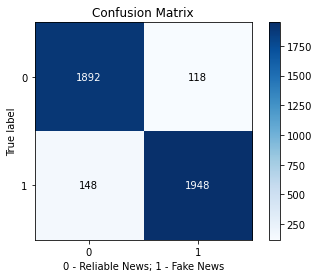

In [43]:
# Confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.xlabel('0 - Reliable News; 1 - Fake News')